<a href="https://colab.research.google.com/github/StalkYy-06/5CS037-2024/blob/main/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# mounting the drive to import the database

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# importing necessary python package

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 3.1 Problem - 1: Getting Started with Data Exploration - Some Warm up
### Exercises:

### 1. Data Exploration and Understanding:

 • Dataset Overview:

1. Load the dataset and display the first 10 rows.

In [8]:
# loding provided dataset
df=pd.read_csv('/content/gdrive/My Drive/WHR-2024-5CS037.csv')

# displaying the first 10 rows
df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


2. Identify the number of rows and columns in the dataset.

In [13]:
# displaying the rows and colums in the dataset

df.shape # displays in the format of "(rows,columns)"

(143, 9)

3. List all the columns and their data types.

In [15]:
# using dtypes to print all the data and their datatypes

df.dtypes

,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


• Basic Statistics:

1. Calculate the mean, median, and standard deviation for the Score column.

In [19]:
# calculating the mean using the '.mean()' method

mean = df['score'].mean()

# calculating the median using the '.median()' method

median = df['score'].median()

# calculating the Standard Deviation using the '.std()' method

standard_deviation =df['score'].std()

# printing the obtained data respectively

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {standard_deviation}")

Mean: 5.52758041958042
Median: 5.785
Standard Deviation: 1.1707165099442995


2. Identify the country with the highest and lowest happiness scores.

In [21]:
# using '.min()' & '.max()' methods to find the lowest and highest happiness score respectively

highest_score = df['score'].max()
lowest_score = df['score'].min()

#comparing the score highest and lowest score to every row and extracting the name

highest_country = df.loc[df['score'] == highest_score, 'Country name'].values[0]
lowest_country = df.loc[df['score'] == lowest_score, 'Country name'].values[0]

# printing the obtained data

print(f"country with Highest Happiness Score: {highest_country}")
print(f"Country with Lowest Happiness Score: {lowest_country}")

country with Highest Happiness Score: Finland
Country with Lowest Happiness Score: Afghanistan


• Missing Values:

1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [22]:
# displaying the number of missing values in the dataset

df.isnull().sum()

,0
Country name,0
score,0
Log GDP per capita,3
Social support,3
Healthy life expectancy,3
Freedom to make life choices,3
Generosity,3
Perceptions of corruption,3
Dystopia + residual,3


• Filtering and Sorting:

1. Filter the dataset to show only the countries with a Score greater than 7.5.

In [24]:
# subsetting the dataset containing countires with score greater than 7.5

higher_score = df[df['score'] > 7.5]

# printing the subset

higher_score

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the top 10 rows.

In [31]:
# sorting the filtered data in descending order

sorted_higher_score = higher_score.sort_values(by='Log GDP per capita', ascending=False)

# printing the top 10 rows

sorted_higher_score.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


• Adding New Columns:

1. Create a new column called Happiness_Category that categorizes countries into three categories
based on their Score:



In [29]:
# defining the function to categorize happiness

def category(score):
  if score > 6:
    return 'High'
  elif score > 4:
    return 'Medium'
  else:
    return 'Low'

# creating the new column 'Happiness_category' and using the function defined above to fill it

df['Happiness_Category'] = df['score'].apply(category)

# printing the head of the dataframe to check the result

df.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High


2. Data Visualizations:

• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

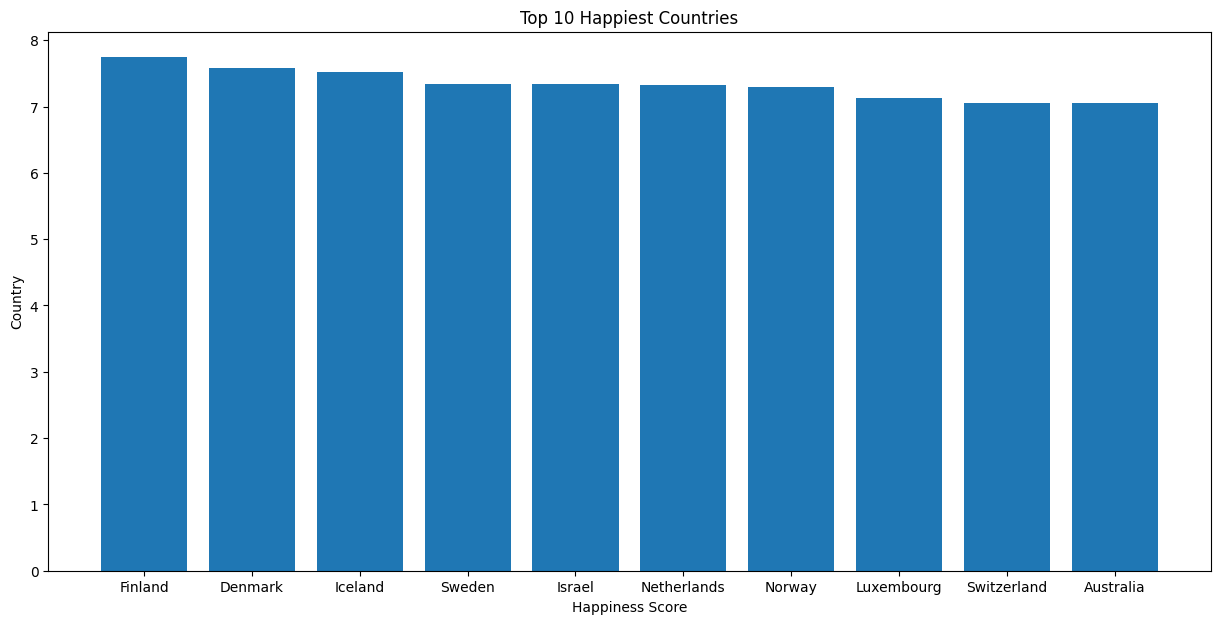

In [39]:
# plotting the bar plot

plt.figure(figsize=(15, 7))
plt.bar(df['Country name'].head(10), df['score'].head(10))

# adding labels and titles to the plot

plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.title('Top 10 Happiest Countries')

#displaying the plot
plt.show()

• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

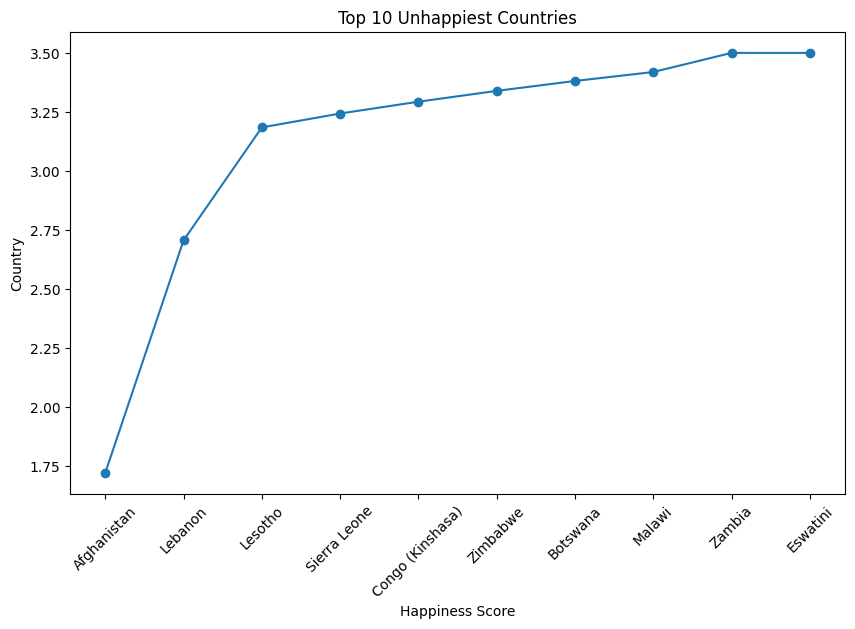

In [48]:
# using 'df.nsmallest()' method to select 10 countries with the lowest score

unhappiest_countries = df.nsmallest(10, 'score')

# plotting the line plot

plt.figure(figsize=(10, 6))
plt.plot(unhappiest_countries['Country name'], unhappiest_countries['score'], marker='o')

# adding labels and titles to the plot

plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.title('Top 10 Unhappiest Countries')

#displaying the plot
plt.xticks(rotation=45)  # Rotating the country names for better visibility
plt.show()

• Plot a histogram for the Score column to show its distribution and also interpret.

Text(0, 0.5, 'Frequency')

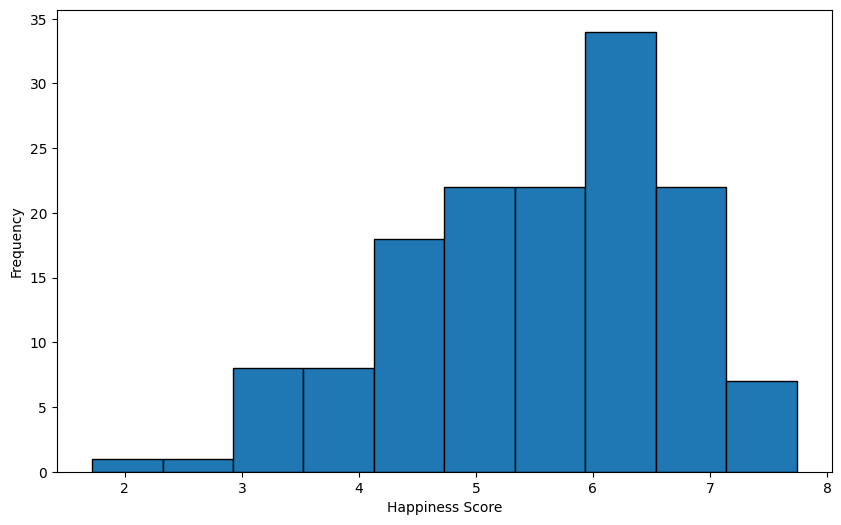

In [51]:
# plotting the histogram for 'Score' column

plt.figure(figsize=(10, 6))
plt.hist(df['score'],edgecolor='black')

# adding labels and titles to the plot

plt.xlabel('Happiness Score')
plt.ylabel('Frequency')

- Output interpretion :

looking at the above histogram the highest number pf score lies at the earlier 6 margin and the frequency decrease at both side of the spectrum from there. The highest happiness score is between 7 and 8 while the lowest is between 0 and 2.

• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

Text(0, 0.5, 'Happiness Score')

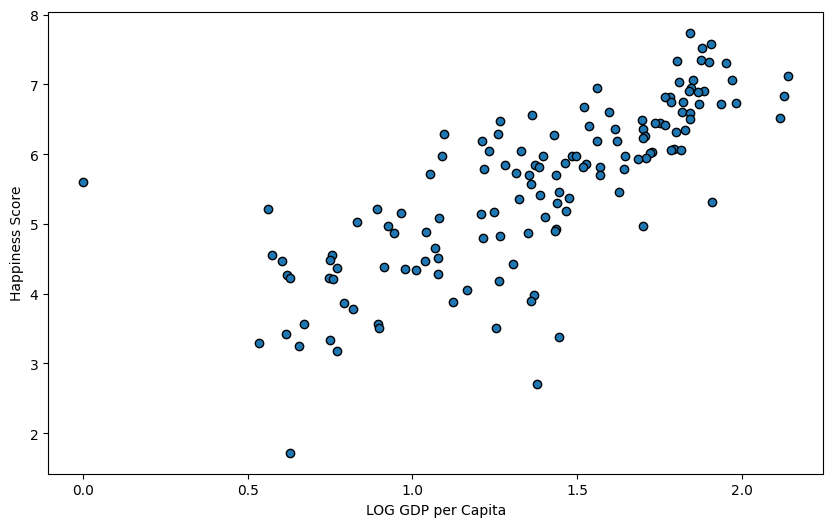

In [54]:
#plotting the scatter plot between GDP per capita and Score
plt.figure(figsize=(10, 6))
plt.scatter(df['Log GDP per capita'], df['score'],edgecolor='black')

# adding labels and titles to the plot

plt.xlabel('LOG GDP per Capita')
plt.ylabel('Happiness Score')

Analasying the above scatter plot we can see an upward trend between the score and GDP per capita. It suggests that as GDP per Capita increases the happiness score tends to increase. Which means that country with higher GDP per Capita is likely to have higher happiness score.

# 3.2 Problem - 2 - Some Advance Data
## Exploration Task:

### Task - 1 - Setup Task - Preparing the South-Asia Dataset:

Steps:

1. Define the countries in South Asia with a list for example:

south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Srilanka"]

In [56]:
# Defining the countries in South Asia with a list

south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Srilanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}

In [57]:
# using the list to filter out the matching dataset

filtered_dataset = df[df['Country name'].isin(south_asian_countries)]

#printing the dataset

filtered_dataset

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


3. Save the filtered dataframe as separate CSV files for future use.

In [58]:
#saving the filtered dataframe as seperate CSV file

filtered_dataset.to_csv('South_Asia.csv', index=False) #saving the file w/o index

### Task - 2 - Composite Score Ranking:

Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support + 0.30 × Healthy Life Expectancy

In [61]:
# loding the South_Asia dataFrame

df2 = pd.read_csv('South_Asia.csv')

#creating the composite score column

df2['Composite Score'] = (0.40 * df2['Log GDP per capita'] + 0.30 * df2['Social support'] + 0.30 * df2['Healthy life expectancy'])

#displaying the head of South_Asia dataFrame to check the code

df2.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category,Composite Score
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
3,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774
4,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238


2. Rank the South Asian countries based on the Composite Score in descending order.

In [62]:
# ranking the south asian countries based on the composite score in descending order

ranked_df = df2.sort_values(by='Composite Score', ascending=False)

# printing the ranked dataframe

ranked_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category,Composite Score
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
3,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774
4,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238


3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

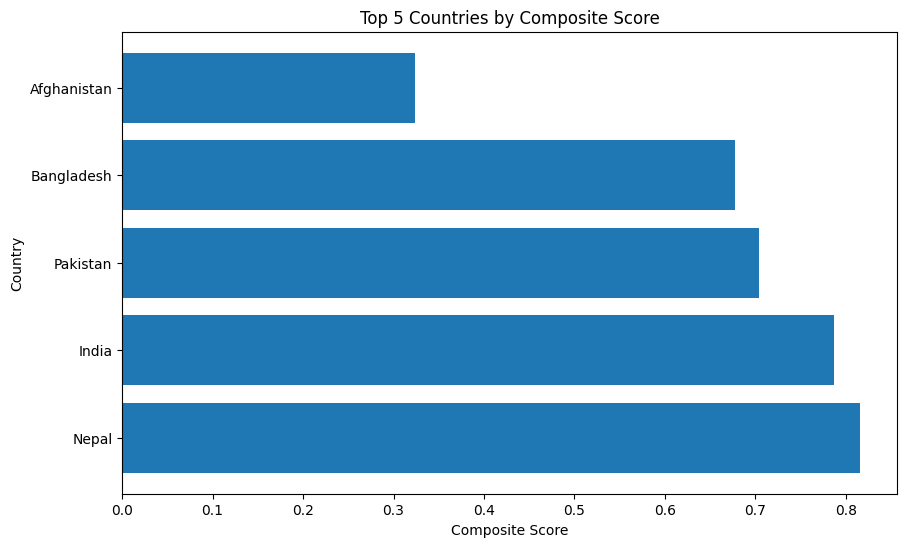

In [66]:
#seperating the top 5 countries
top_5 = ranked_df.head(5)

# plotting the top 5 countries using a horizontal bar chart

plt.figure(figsize=(10, 6))
plt.barh(top_5['Country name'], top_5['Composite Score'])

# adding labels and titles to the plot

plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.title('Top 5 Countries by Composite Score')

#displaying the plot
plt.show()

4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

- Answer : The rankings based on the composite Score aligns with the original score in most cases but may vary for some small number of cases. We can look at the scatter plot plotted below to see the visualiation of the theory.

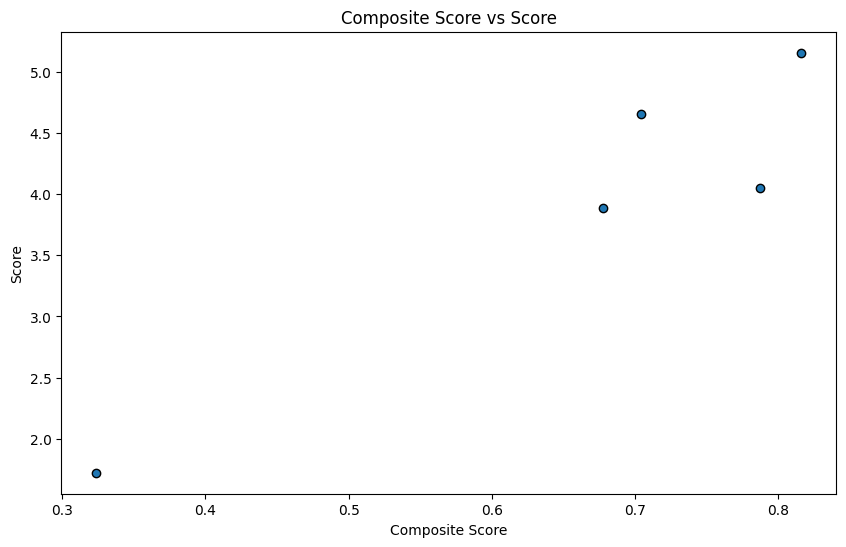

In [74]:
# using scatter plot to visualize
plt.figure(figsize=(10, 6))
plt.scatter(df2['Composite Score'],df2['score'], edgecolor='black')

# adding lables and title
plt.xlabel('Composite Score')
plt.ylabel('Score')
plt.title('Composite Score vs Score')

#displaying the plot
plt.show()